# Explore Echo Parakeet Segmentation, Features and Training via PyAudioAnalysis




In [1]:
import matplotlib.pyplot as plt

import sound_segmentation

PSeg = sound_segmentation 

import sounddevice as sd
#import soundfile as sf
from pyAudioAnalysis import audioTrainTest as aT

from pydub.utils import get_array_type
import array
from pyAudioAnalysis import ShortTermFeatures, MidTermFeatures
from numpy import int16

import os
import pyAudioAnalysis
import numpy as np
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
from scipy.io.wavfile import write
import pandas as pd


from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio


<ipython-input-2-9e8711b773e1>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


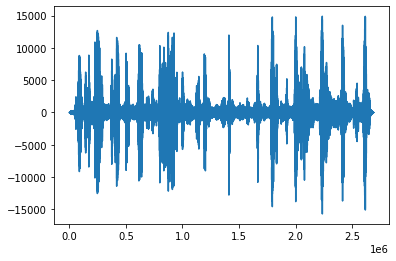

In [2]:
path = os.path.join(os.getcwd(), "../../", "inputs/mp3/XC204495-EchoParakeet-Psittaculaeques.mp3")

(fs,num_a,samples,_) = PSeg.load_data(path)
sample_rate = 1/fs

fig = plt.figure()
plt.plot(num_a)
fig.show()




In [5]:
Audio(num_a, rate=fs)


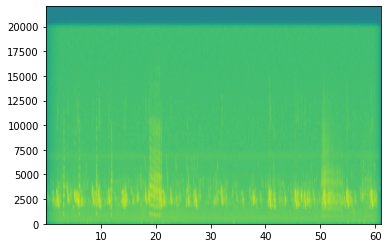

In [6]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(num_a, Fs=fs)
plt.show()

In [ ]:


left = sound.split_to_mono()[0]
bit_depth = left.sample_width * 8

array_type = get_array_type(bit_depth)
num_a = array.array(array_type, left._data)

fig = plt.figure()
plt.plot(num_a[0:1000000])
fig.show()


In [ ]:
recording_duration = len(num_a)/fs

In [ ]:
segments = aS.silence_removal(np.array(num_a), fs, 0.020, 0.020, smooth_window = 1.0, weight = 0.3, plot = True)


In [ ]:
segments_dont_use = aS.silence_removal(np.array(num_a[0:1000000]), fs, 0.020, 0.020, smooth_window = 1.0, weight = 0.325, plot = True)


In [ ]:
segments_dont_use = aS.silence_removal(np.array(num_a[0:1000000]), fs, 0.020, 0.020, smooth_window = 1.0, plot = True)



# Show just a truncated version of the segmentated signal


In [ ]:
sampling_rate = 1.0/fs
signal = np.array(num_a)
time_x = np.arange(0, signal.shape[0] / float(sampling_rate), 1.0 /
                   sampling_rate)

plt.plot(time_x, signal)
plt.show()

# Note cell below needs debugging. The silence removal clearly works above but reconciling this with the original waveform scale is not brainless for me.

In [ ]:
#segments

for ind,seg in enumerate(segments):
    if ind<15:
        onset = int(seg[0]*fs)
        offset = int(seg[1]*fs)
        #import pdb
        #pdb.set_trace()
        delta0 = offset - onset
        print("delta0",delta0)
        print(onset,"onset")
        print(seg[0],seg[1],recording_duration)

        print(offset,"offset")
        if ind>1:
            wave_sound = np.array(num_a)[onset:offset]

            wave_silence = num_a[old_offset:onset]
            delta1 = old_offset - onset
            print("delta1",delta1)
            print("delta-delta",delta1<delta0)
            print(np.sum(np.abs(wave_silence)),"silence")
            print(np.sum(np.abs(wave_sound)),"sound")
            print("total duration (sec)",recording_duration)
            print(offset/len(num_a))
            #assert np.sum(wave_sound) > np.sum(wave_silence)
            #fig = plt.figure()

            #plt.legend()
            #plt.show()

            fig = plt.figure()
            plt.plot(time_x[onset:offset],wave_sound,label="sound")

            plt.plot(time_x[old_offset:onset],wave_silence,label="silence")

            plt.legend()
            plt.show()

        old_offset = offset


    #segs_th.extend(wave)

In [ ]:
#Audio(segments, rate=20000)


scaled = np.int16(segments/np.max(np.abs(segments)) * fs)
write('temp.wav', fs, scaled)



sample_rate, samples = wavfile.read('temp.wav')
#Audio(samples, rate=sample_rate)
#frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)




In [ ]:

segs_th=[]
for ind,seg in enumerate(segments):
    if ind<6:
        onset = int(seg[0]*fs)
        offset = int(seg[1]*fs)
        wave = num_a[onset:offset]
        segs_th.extend(wave)
fig = plt.figure()
plt.plot(segs_th,label="hard_threshold")

plt.legend()
plt.show()

In [ ]:


# need to convert array to type Int64
# before you can expect this method to work.
#filename = 'myfile.wav'
# Extract data and sampling rate from file
#data, fs = sf.read(filename, dtype='float32')  
#sd.play(segs_th, fs)
#status = sd.wait()  # Wait until file is done playing

In [ ]:

segs_th_trunc=[]
for seg in segments:
    onset = int(seg[0]*fs)
    offset = int(seg[1]*fs)
    wave = num_a[onset:offset]
    segs_th_trunc.extend(wave)
    
segs_th_trunc = np.array(segs_th_trunc)
    
fig = plt.figure()
plt.plot(segs_th_trunc,label="hard_threshold")

plt.legend()
plt.show()    





# Writing to file means that can use PyAudio's bash API


In [ ]:
write("../kestrel_segs_th.wav", fs, int16(segs_th))


In [ ]:
!ls ../kestrel_segs_th.wav
!du -h ../kestrel_segs_th.wav

In [ ]:
#from pyAudioAnalysis import audioBasicIO
F, f_names = ShortTermFeatures.feature_extraction(segs_th, fs, 0.050*fs, 0.025*fs)
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [ ]:
matrix_ = aT.features_to_matrix(F)
#print(np.shape(matrix_))
#plt.imshow(matrix_[:])

In [ ]:
for i,name in enumerate(f_names):
    fig = plt.figure()
    plt.plot(F[i,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[i]) 
    plt.show()


In [ ]:

df = pd.DataFrame([{ff_names:np.sum(ff) for ff, ff_names in zip(F, f_names)}])
df=df.T
df

In [ ]:
midFeat,shortFeat,midFeatLabels=MidTermFeatures.mid_feature_extraction(
    segs_th,
    fs,
    0.43*fs, 0.43*fs,
    0.16*fs, 0.16*fs
)
matrix_mid = aT.features_to_matrix(midFeat)


In [ ]:
F = midFeat
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [ ]:
for i,name in enumerate(f_names):
    fig = plt.figure()
    plt.plot(F[i,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[i]) 
    plt.show()


In [ ]:
df = pd.DataFrame([{ff_names:np.sum(ff) for ff, ff_names in zip(midFeat, midFeatLabels)}])
df=df.T
df

# Train on a directory full of random experiments
Not real training data.

Note this shows nothing, except for correct syntax of `extract_features_and_train`
method.

Training data is almost random nonsense on two birds.

In [ ]:
results = aT.extract_features_and_train("../", 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svmModel", False)


In [ ]:
Result, P, classNames = results

# This doesnt work yet.

In [ ]:

outputs = aT.extract_features_and_train(
    "../",
    0.43*fs, 0.43*fs,
    0.16*fs, 0.16*fs,
    classifier_type="gradientboosting",
    model_name="kestrel_learning"
)